# Importing Libraries :

Disini kita akan mengimport Libraries yang akan di pakai pada dataset ini secara satu - persatu, Libraries yang dipakai adalah :

numpy, pandas: Untuk perhitungan numerik dan manipulasi data, 
matplotlib, seaborn: Untuk visualisasi data, 
tensorflow, keras: Untuk membangun dan melatih model pembelajaran mendalam, 
sklearn: Untuk memisahkan data, mengevaluasi kinerja model, dan augmentasi data, 
cv2: Untuk pemrosesan gambar, 
PIL: Untuk memuat dan menampilkan gambar dasar, 
pathlib: Untuk bekerja dengan jalur file, 
collections: Untuk menghitung kemunculan label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline 
import seaborn as sns
#menggunakan ANN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import cv2
import os
import PIL #image library in python
import pathlib
#untar untuk mengzipkan file

# Loading and Exploring Data :

setelah itu kita akan mendirect data gambar bunga yang akan kita pakai untuk training nanti menggunakan :

data_dir = pathlib.Path('...'): Menyetel jalur ke kumpulan data gambar bunga.

In [2]:
data_dir = pathlib.Path('D:\\New folder\\Tugas Kampus\\flower_photos')
data_dir

WindowsPath('D:/New folder/Tugas Kampus/flower_photos')

setelah kita direct folder dari data bunga nya kita akan menghitung jumlah gambar yang berformat jpg yang berada di folder tesersebut.

image_count = len(...): Menghitung jumlah gambar dalam kumpulan data.

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

setelah itu kita akan mendefinisikan nama bunga dan mendirect nama bunga tersebut ke folder yang berada gambar dari setiap masing - masing nama bunga.

In [4]:
daisy = list(data_dir.glob('daisy/*.jpg'))
dandelion = list(data_dir.glob('dandelion/*.jpg'))
roses = list(data_dir.glob('roses/*.jpg'))

lalu kita akan coba untuk membuka gambar dari masing - masing nama bunga yang
akan dilakukan oleh 3 cell kebawah ini

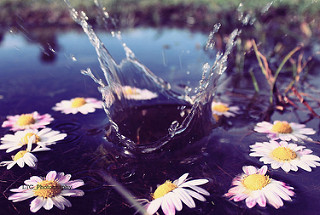

In [5]:
PIL.Image.open(str(daisy[2]))

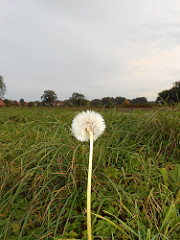

In [6]:
PIL.Image.open(str(dandelion[2]))

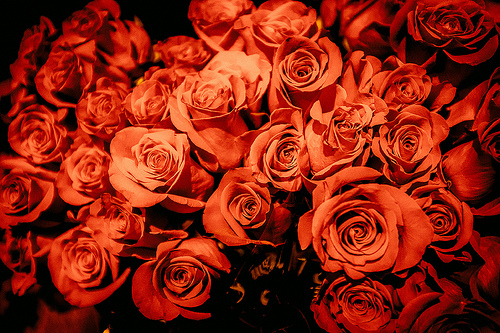

In [7]:
PIL.Image.open(str(roses[2]))

setelah itu kita akan membuat dictionary untuk menyimpan directory gambar dari masing - masing bunga.

flowers_images_dict = {...}: Membuat kamus untuk menyimpan jalur gambar untuk setiap jenis bunga.

In [8]:
flowers_images_dict = {
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'roses' : list(data_dir.glob('roses/*.jpg')),
}

lalu kita akan membuat label numerik untuk mendefinisikan masing - masing bunga.

flowers_labels_dict = {...}: Menetapkan label numerik untuk setiap jenis bunga.

In [9]:
flowers_labels_dict = {
    'daisy' : 0,
    'dandelion' :  1,
    'roses' : 2,
}

# Preprocessing Images :

lalu kita masuk kebagian prosesing gambar nya

x, y = [], []: Menginisialisasi daftar untuk menyimpan data gambar dan label terkait.

img = cv2.imread(...), resized_img = cv2.resize(...): Membaca gambar menggunakan OpenCV dan mengubah ukurannya menjadi 256x256 piksel.

x.append(resized_img), y.append(flowers_labels_dict[...]): Menambahkan gambar dan label ke daftar.

In [10]:
x,y = [], []

for flowers_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        x.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])

In [11]:
len(y)

2172

In [12]:
y.count(2)

641

lalu kita akan mengonversi array numpy x dan y sebagai x dan x

x = np.array(x), y = np.array(y): Mengonversi daftar menjadi array NumPy untuk pemrosesan yang efisien.

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
x.shape

(2172, 256, 256, 3)

# Splitting Data :

setalah kita memproses gambar kita masuk ke dalam pembagian data nya, kita membagi data menjadi 2 yaitu pelatihan dan pengujian menggunakan coding sebagai berikut

x_train, x_test, y_train, y_test = train_test_split(...): Membagi data menjadi set pelatihan dan pengujian (80% untuk pelatihan, 20% untuk pengujian).

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)
print('x_train size {}, x_test size : {}'.format(x_train.shape, x_test.shape))

x_train size (1737, 256, 256, 3), x_test size : (435, 256, 256, 3)


setelah di bagi kita akan menormalkan jumlah piksel yang ada di foto menjadi [0,1]

x_train_scaled = x_train / 255, x_test_scaled = x_test / 255: Menormalkan nilai piksel ke rentang [0, 1].

In [16]:
x_train_scaled = x_train / 255
x_test_scaled = x_test/255

In [17]:
from collections import Counter
counts = Counter(y_test)

# Print the results
for value, count in counts.items():
    print(f"{value} occurs {count} times")

2 occurs 122 times
0 occurs 137 times
1 occurs 176 times


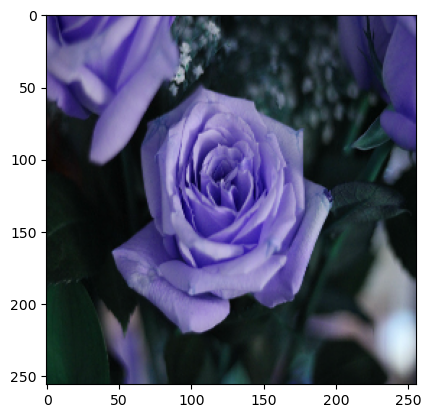

In [18]:
plt.imshow(x_test[79])

In [19]:
y_test[79]

2

# Data Augmentation :

lalu kita masuk kedalam persiapan data untuk pelatihan menggunakan keras, disini kita akan meng augmentasi data dan menggunakan Random agar membuat data nya menjadi lebih bervariasi untuk pelatihan.

data_augmentation = keras.Sequential(...): Membuat pipeline augmentasi data untuk memperkenalkan variasi pada data pelatihan.

RandomFlip, RandomZoom, RandomRotation: Menerapkan pembalikan horizontal acak, zoom, dan rotasi pada gambar.

In [20]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',
                                                       input_shape = (
                                                       256,
                                                        256,
                                                           3
                                                       )),
    
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
#     keras.layers.experimental.preprocessing.RandomContrast(0.3),
   
    
])

# Building the CNN Model :

setelah data di siapkan kita akan membuat model CNN terlebih dahulu.

cnn = keras.models.Sequential(...): Membuat arsitektur model sekuensial.

Conv2D, MaxPooling2D: Menambahkan lapisan konvolusional dengan kernel 3x3 dan lapisan penggabungan maksimal untuk ekstraksi fitur.

Dropout: Secara acak menjatuhkan 20% koneksi selama pelatihan untuk mencegah overfitting.

Ratakan, Padat: Meratakan peta fitur dan menambahkan lapisan yang terhubung sepenuhnya untuk klasifikasi.

softmax: Menggunakan aktivasi softmax di lapisan terakhir untuk menampilkan probabilitas untuk setiap kelas.

kompilasi(...): Mengonfigurasi model untuk pelatihan dengan kehilangan crossentropy kategoris yang jarang, pengoptimal Adam, dan akurasi sebagai metrik.

In [21]:

cnn = keras.models.Sequential([
    data_augmentation ,
    #cnn
    
    keras.layers.Conv2D(30,kernel_size=(3,3),activation='relu',input_shape=(128, 128, 3), padding='same',),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu',input_shape=(128, 128, 3), padding='same'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(66,kernel_size=(3,3),activation='relu',input_shape=(128, 128, 3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
    
])

cnn.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)


# Training the Model :

baru lah kita latih model nya menggunakan epochs sebanyak 30x

cnn.fit(x_train_scaled, y_train, epochs=30): Melatih model selama 30 epoch menggunakan data pelatihan.

In [22]:
cnn.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30


55/55 [==============================] - 86s 1s/step - loss: 1.0920 - accuracy: 0.5273
Epoch 2/30
55/55 [==============================] - 69s 1s/step - loss: 0.7744 - accuracy: 0.6615
Epoch 3/30
55/55 [==============================] - 68s 1s/step - loss: 0.7028 - accuracy: 0.7179
Epoch 4/30
55/55 [==============================] - 70s 1s/step - loss: 0.6240 - accuracy: 0.7524
Epoch 5/30
55/55 [==============================] - 69s 1s/step - loss: 0.5527 - accuracy: 0.7812
Epoch 6/30
55/55 [==============================] - 62s 1s/step - loss: 0.5254 - accuracy: 0.7922
Epoch 7/30
55/55 [==============================] - 64s 1s/step - loss: 0.4981 - accuracy: 0.8077
Epoch 8/30
55/55 [==============================] - 62s 1s/step - loss: 0.4573 - accuracy: 0.8325
Epoch 9/30
55/55 [==============================] - 66s 1s/step - loss: 0.4475 - accuracy: 0.8244
Epoch 10/30
55/55 [==============================] - 64s 1s/step - loss: 0.4430 - accuracy: 0.8336
Epoch 11/30
55/55

# Evaluating Performance :

lalu setelah itu kita akan meng evaluasi hasil pelatihan tadi, pertama kita akan memprediksi label untuk gambar uji.

In [23]:
y_predicted = cnn.predict(x_test_scaled)

14/14 [==============================] - 3s 207ms/step


setelah itu kita akan mengekstrak label kelas yang diprediksi.

In [24]:
y_pred_labels = [np.argmax(x) for x in y_predicted]
y_pred_labels

[2,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 1,


lalu membuat matriks konfusi untuk memvisualisasikan prediksi yang benar dan salah.

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 98,  18,  21],
       [ 10, 150,  16],
       [  7,   8, 107]])>

dan membuat plot matriks konfusi menggunakan Seaborn.

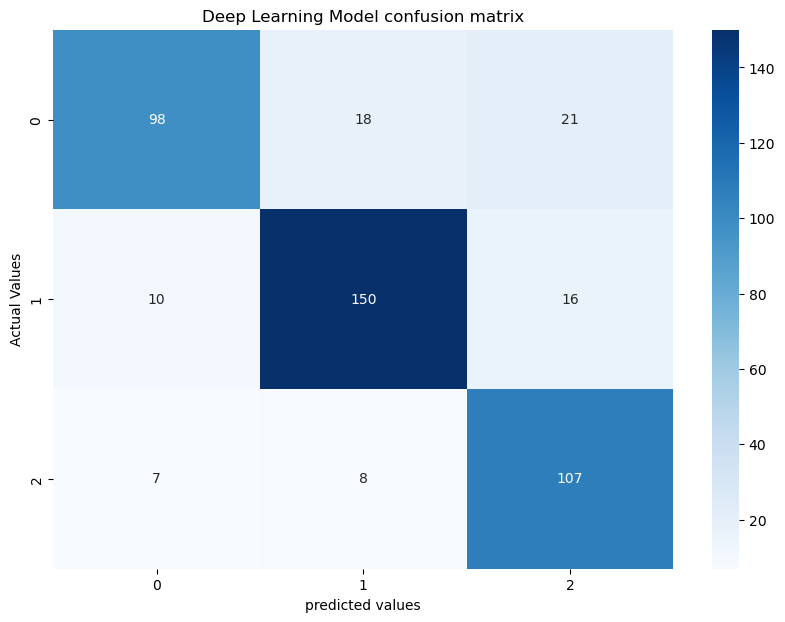

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
p = sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.title('Deep Learning Model confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.show()

barulah kita akan menghitung akurasi keseluruhan pada set tes dan mencetak presisi, perolehan, dan skor F1 untuk setiap kelas.

In [27]:
score = round(accuracy_score(y_test,y_pred_labels),4)*100
print("Accuracy on Test : {}%".format(score))
print(classification_report(y_test,y_pred_labels))

Accuracy on Test : 81.61%
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       137
           1       0.85      0.85      0.85       176
           2       0.74      0.88      0.80       122

    accuracy                           0.82       435
   macro avg       0.82      0.81      0.81       435
weighted avg       0.82      0.82      0.82       435



# Saving the Model :

lalu step terakhir ialah save model nya sebagai file format h5 menggunakan keras

In [28]:
# Import the necessary library
import keras.models

# Save the model to an H5 file
cnn.save('model_flowers.h5')  # Replace 'model_flowers.h5' with your desired filename


D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
